<a href="https://colab.research.google.com/github/joshuacalloway/dsc540groupproject/blob/main/StartingTrumpTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using NLP on Trump's Tweets

## A. Fetch 1000 of Trump's latest tweets
Here we use thetrumparchive to fetch 1000 of Trump's latest tweets.  The tweets come back as JSON in format of
<code>
{
  id: 1
  text: 'Lets win Michigan'
  isRetweet: True
  isDeleted: False
  device: iPhone
  favorites: 323,
  retweets: 2
  date: 2020-11-02
}
</code>

In [52]:
import urllib.request, json 

In [53]:
with urllib.request.urlopen("https://www.thetrumparchive.com/latest-tweets") as url:
    data = json.loads(url.read().decode())


In [54]:
# we r interested in the text for NLP
get_tweet_text = lambda tweet : tweet['text']

print(get_tweet_text(data[0])) 


Just landed in Traverse City, Michigan. Big crowd!


In [55]:

tweets = map(get_tweet_text, data)
list(tweets)

['Just landed in Traverse City, Michigan. Big crowd!',
 '¡Mi #AmericanDreamPlan es una promesa para los hispanoamericanos de impulsar una economía próspera, proveer oportunidades de educación para todos, preservar la libertad y apoyar la fe, la familia y la comunidad!\xa0https://t.co/RSuEyIFQ0W',
 'My #AmericanDreamPlan is a promise\xa0to Hispanic Americans to fuel a thriving economy, provide education opportunity for all, preserve freedom, and support faith, family, and community!\xa0\nhttps://t.co/5VPkbZPavC',
 'RT @ClayTravis: I am voting for @realDonaldTrump for president this year. Here’s why: https://t.co/5U5BjB5pZb',
 'As Christians throughout this great Country celebrate All Souls Day, let’s remember those who went before us and built this great nation. May their legacy inspire us as we keep our nation what it has always been: blessed and great!',
 'For years you had a President who apologized for America – now you have a President who is standing up for America, and standing u

## B. Let's use a tweepy and TextBlob to see what common sentiment and subjectivity of each Tweet 

Two blogs that use tweepy and TextBlob can be found at 
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/
- https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082



In [56]:
# We r going to use tweepy and TextBlob for tweets

import tweepy as tw
from textblob import TextBlob

In [57]:
# First we load the tweets into a pandas DataFrame
from pandas import DataFrame

df = DataFrame(data)
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,1323394390446977024,"Just landed in Traverse City, Michigan. Big cr...",False,False,Twitter for iPhone,70590,9537,2020-11-02T22:39:44.000Z
1,1323390619570626560,¡Mi #AmericanDreamPlan es una promesa para los...,False,False,Twitter for iPhone,34403,7669,2020-11-02T22:24:45.000Z
2,1323390300505690112,My #AmericanDreamPlan is a promise to Hispanic...,False,False,Twitter for iPhone,28049,5999,2020-11-02T22:23:29.000Z
3,1323389514476302336,RT @ClayTravis: I am voting for @realDonaldTru...,True,False,Twitter for iPhone,0,6267,2020-11-02T22:20:22.000Z
4,1323387597796900866,As Christians throughout this great Country ce...,False,False,Twitter for iPhone,64380,13073,2020-11-02T22:12:45.000Z


In [58]:
df['isRetweet'].value_counts()

False    678
True     322
Name: isRetweet, dtype: int64

In [59]:
df['device'].value_counts()

Twitter for iPhone    999
Twitter Web App         1
Name: device, dtype: int64

In [60]:
# Define some cleaning methods for the Tweet Text
# Create a function to clean the tweets
import re

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text.lower()

# Remove URLs for cleaning the tweet text
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [61]:

# Very simple, if score is negative, we mark the Polarity as negative
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [62]:
# we clean the text for each Tweet
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,1323394390446977024,"just landed in traverse city, michigan. big cr...",False,False,Twitter for iPhone,70590,9537,2020-11-02T22:39:44.000Z
1,1323390619570626560,¡mi americandreamplan es una promesa para los ...,False,False,Twitter for iPhone,34403,7669,2020-11-02T22:24:45.000Z
2,1323390300505690112,my americandreamplan is a promise to hispanic ...,False,False,Twitter for iPhone,28049,5999,2020-11-02T22:23:29.000Z
3,1323389514476302336,: i am voting for for president this year. he...,True,False,Twitter for iPhone,0,6267,2020-11-02T22:20:22.000Z
4,1323387597796900866,as christians throughout this great country ce...,False,False,Twitter for iPhone,64380,13073,2020-11-02T22:12:45.000Z
...,...,...,...,...,...,...,...,...
995,1316187932961587200,proud citizens like you helped build this coun...,False,False,Twitter for iPhone,62382,16086,2020-10-14T01:23:51.000Z
996,1316186724897157121,this election is a simple choice: if biden win...,False,False,Twitter for iPhone,73206,18186,2020-10-14T01:19:03.000Z
997,1316186695579004929,one of the most important issues for pennsylva...,False,False,Twitter for iPhone,44142,11330,2020-10-14T01:18:56.000Z
998,1316183611809300480,"thank you johnstown, pennsylvania!",False,False,Twitter for iPhone,81435,16576,2020-10-14T01:06:41.000Z


# C. We compute Subjectivity and Polarity of Tweet using TextBlob
- subjectivity is how opinionated a tweet is ( scaled from 1 to -1 )
- polarity is whether or not the tweet is positive or negative ( scaled from 1 to -1 )

In [63]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# We eliminate words less then 3 characters long and standardize all words to lowercase
def filter_words(words):
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    return words_filtered



# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,Subjectivity,Polarity
0,1323394390446977024,"just landed in traverse city, michigan. big cr...",False,False,Twitter for iPhone,70590,9537,2020-11-02T22:39:44.000Z,0.100000,0.000000
1,1323390619570626560,¡mi americandreamplan es una promesa para los ...,False,False,Twitter for iPhone,34403,7669,2020-11-02T22:24:45.000Z,0.000000,0.000000
2,1323390300505690112,my americandreamplan is a promise to hispanic ...,False,False,Twitter for iPhone,28049,5999,2020-11-02T22:23:29.000Z,0.000000,0.000000
3,1323389514476302336,: i am voting for for president this year. he...,True,False,Twitter for iPhone,0,6267,2020-11-02T22:20:22.000Z,0.000000,0.000000
4,1323387597796900866,as christians throughout this great country ce...,False,False,Twitter for iPhone,64380,13073,2020-11-02T22:12:45.000Z,0.750000,0.866667
...,...,...,...,...,...,...,...,...,...,...
995,1316187932961587200,proud citizens like you helped build this coun...,False,False,Twitter for iPhone,62382,16086,2020-10-14T01:23:51.000Z,0.333333,0.266667
996,1316186724897157121,this election is a simple choice: if biden win...,False,False,Twitter for iPhone,73206,18186,2020-10-14T01:19:03.000Z,0.279592,0.410714
997,1316186695579004929,one of the most important issues for pennsylva...,False,False,Twitter for iPhone,44142,11330,2020-10-14T01:18:56.000Z,0.796296,0.560417
998,1316183611809300480,"thank you johnstown, pennsylvania!",False,False,Twitter for iPhone,81435,16576,2020-10-14T01:06:41.000Z,0.000000,0.000000


# D. For fun, we create a wordcloud of Trump's positive and negative tweets

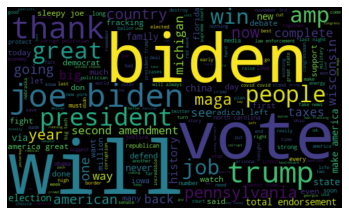

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud visualization of all Tweets
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

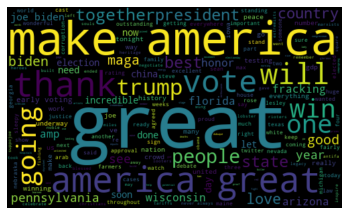

In [65]:
# word cloud visualization for positive tweets
positive_words = df[df.Polarity > 0.5]['text']

allWords = ' '.join([twts for twts in positive_words])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

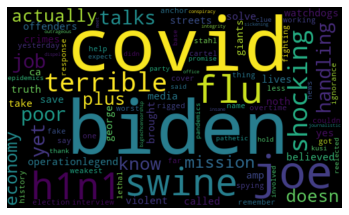

In [66]:
# word cloud visualization for positive tweets
negative_words = df[df.Polarity < -0.5]['text']

allWords = ' '.join([twts for twts in negative_words])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

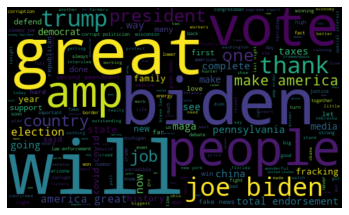

In [67]:
# word cloud visualization for Subjectivity tweets
positive_words = df[df.Subjectivity > 0.5]['text']

allWords = ' '.join([twts for twts in positive_words])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# D. Trying NLTK to analyze NLP on Trump's Tweets as outlined in

- http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/
- https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed

We need to create a training set of tweets labelled positive or negative

In [74]:
def tweet_text_from_tuple(tweet):
    return tweet[0]

def tweet_sentiment_from_tuple(tweet):
    return tweet[1]

def transform_tweet(tweet):
    if tweet['Polarity'] > 0:
        return (tweet['text'], 'positive')
    else:
        return (tweet['text'], 'negative')
        

In [75]:
pos_tweets = []
neg_tweets = []
for index, row in df.iterrows():
    tweet = transform_tweet(row)
    if (tweet[1] == 'negative'):
        neg_tweets.append(tweet)
    else:
        pos_tweets.append(tweet)

len(neg_tweets)

595

In [76]:


tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = filter_words(words)
    tweets.append((words_filtered, sentiment))

In [77]:
tweets

[(['people',
   'are',
   'forgetting',
   'that',
   'sleepy',
   'joe',
   'biden',
   'and',
   'the',
   'radical',
   'left',
   'dems',
   'win,',
   'you',
   'will',
   'vey',
   'quickly',
   'lose',
   'your',
   'second',
   'amendment!'],
  'positive'),
 (['joe',
   'biden',
   'the',
   'candidate',
   'rioters,',
   'looters,',
   'arsonists,',
   'gun-grabbers,',
   'flag-burners,',
   'marxists,',
   'lobbyists,',
   'and',
   'special',
   'interests.',
   'the',
   'candidate',
   'farmers,',
   'factory',
   'workers,',
   'police',
   'officers,',
   'and',
   'hard-working,',
   'law-abiding',
   'patriots',
   'every',
   'race,',
   'religion',
   'and',
   'creed!',
   'maga'],
  'positive'),
 (['live:', 'call', 'prayer', 'text', 'vote', '88022'], 'positive'),
 (['pennsylvania:',
   'biden',
   'said',
   'that',
   'doesn’t',
   'want',
   'fracking.',
   'besides,',
   'and',
   'more',
   'importantly,',
   'his',
   'handlers',
   'won’t',
   'allow',
   'fr

In [78]:
import nltk

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

In [79]:
word_features = get_word_features(get_words_in_tweets(tweets))
word_features

dict_keys(['people', 'are', 'forgetting', 'that', 'sleepy', 'joe', 'biden', 'and', 'the', 'radical', 'left', 'dems', 'win,', 'you', 'will', 'vey', 'quickly', 'lose', 'your', 'second', 'amendment!', 'candidate', 'rioters,', 'looters,', 'arsonists,', 'gun-grabbers,', 'flag-burners,', 'marxists,', 'lobbyists,', 'special', 'interests.', 'farmers,', 'factory', 'workers,', 'police', 'officers,', 'hard-working,', 'law-abiding', 'patriots', 'every', 'race,', 'religion', 'creed!', 'maga', 'live:', 'call', 'prayer', 'text', 'vote', '88022', 'pennsylvania:', 'said', 'doesn’t', 'want', 'fracking.', 'besides,', 'more', 'importantly,', 'his', 'handlers', 'won’t', 'allow', 'would', 'end', 'pennsylvania!', 'michigan', 'was', 'great!', 'landing', 'now', 'dubuque,', 'iowa.', 'see', 'soon.', 'hispanics', 'rally', 'pres', 'trump.', 'huge', 'new', 'poll', 'from', 'abc', 'news', 'for', 'fl.', 'let’s', 'go!', 'latinosfortrump', 'under', 'leadership,', 'our', 'economy', 'growing', 'fastest', 'rate', 'ever', '

In [80]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [81]:
training_set = nltk.classify.apply_features(extract_features, tweets)

In [82]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [83]:
from nltk import ELEProbDist
def train(labeled_featuresets, estimator=ELEProbDist):
    # Create the P(label) distribution
    label_probdist = estimator(label_freqdist)
    # Create the P(fval|label, fname) distribution
    feature_probdist = {}
    return NaiveBayesClassifier(label_probdist, feature_probdist)

In [84]:
tweet = 'pennsylvania: is great!'
extract_features(tweet.split())

{'contains(people)': False,
 'contains(are)': False,
 'contains(forgetting)': False,
 'contains(that)': False,
 'contains(sleepy)': False,
 'contains(joe)': False,
 'contains(biden)': False,
 'contains(and)': False,
 'contains(the)': False,
 'contains(radical)': False,
 'contains(left)': False,
 'contains(dems)': False,
 'contains(win,)': False,
 'contains(you)': False,
 'contains(will)': False,
 'contains(vey)': False,
 'contains(quickly)': False,
 'contains(lose)': False,
 'contains(your)': False,
 'contains(second)': False,
 'contains(amendment!)': False,
 'contains(candidate)': False,
 'contains(rioters,)': False,
 'contains(looters,)': False,
 'contains(arsonists,)': False,
 'contains(gun-grabbers,)': False,
 'contains(flag-burners,)': False,
 'contains(marxists,)': False,
 'contains(lobbyists,)': False,
 'contains(special)': False,
 'contains(interests.)': False,
 'contains(farmers,)': False,
 'contains(factory)': False,
 'contains(workers,)': False,
 'contains(police)': False,
 

In [85]:
classifier.classify(extract_features(tweet.split()))

'negative'

In [86]:
classifier.classify(extract_features(filter_words(tweet_text_from_tuple(pos_tweets[5]))))

'positive'

In [40]:
classifier.classify(extract_features(filter_words(tweet_text_from_tuple(neg_tweets[5]))))

'negative'

In [29]:
pos_tweets[5]

(': Hispanics rally to Pres Trump.\n\nHuge new poll from ABC News for FL.\n\nLet’s go!\n\nLatinosForTrump ',
 'positive')

In [88]:
classifier.classify(extract_features(filter_words(pos_tweets[5][0])))

'positive'

In [36]:
classifier.classify(extract_features(filter_words(neg_tweets[5][0])))

'negative'

In [41]:
classifier.classify(extract_features(tweet_text_from_tuple(pos_tweets[5])))

'negative'

In [87]:
classifier.classify(extract_features(tweet_text_from_tuple(pos_tweets[5])))

'negative'

In [89]:
classifier.classify(extract_features(pos_tweets[5][0]))

'negative'